In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
# LINE PLOT EXAMPLES
# DataFrame.plot.line(...)     <--- many lines (one per column)
# Series.plot.line(...)        <--- one line

In [5]:
s = Series([0, 100, 300, 200, 400])
s

0      0
1    100
2    300
3    200
4    400
dtype: int64

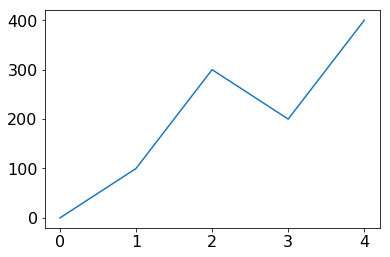

In [6]:
s.plot.line()

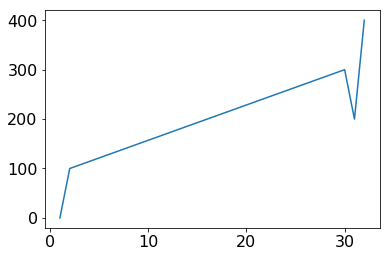

In [7]:
s = Series([0, 100, 300, 200, 400], index=[1, 2, 30, 31, 32])
s.plot.line()

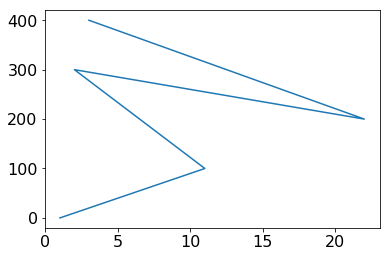

In [8]:
s = Series([0, 100, 300, 200, 400], index=[1, 11, 2, 22, 3])
s.plot.line()

In [9]:
s

1       0
11    100
2     300
22    200
3     400
dtype: int64

In [10]:
# L.sort() <-- modifies the list L, but returns None
#
# BOTH of these create new Series, they DO NOT modify the original
# Series.sort_values()
# Series.sort_index()
s.sort_index()

1       0
2     300
3     400
11    100
22    200
dtype: int64

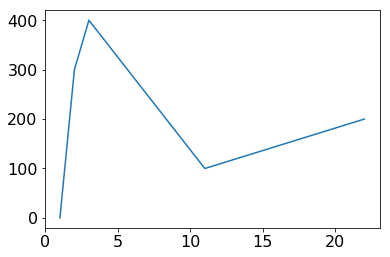

In [14]:
s = s.sort_index()
s.plot.line()

In [15]:
# EXAMPLE 2: DataFrame as line

In [16]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fehrenheit)')

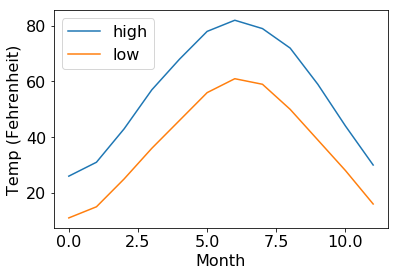

In [18]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

In [23]:
celcius = (df - 32) * (5/9)
celcius

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


Text(0, 0.5, 'Temp (Celcius)')

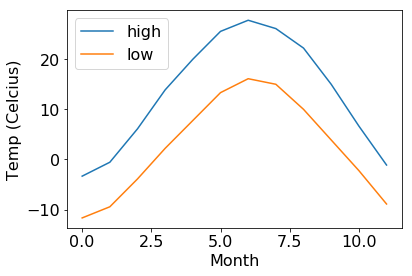

In [24]:
ax = celcius.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")

In [26]:
df = DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df = df.set_index("month")
df

,high,low
month,,
Jan,26,11
Feb,31,15
Mar,43,25
Apr,57,36
May,68,46
Jun,78,56
Jul,82,61
Aug,79,59
Sep,72,50


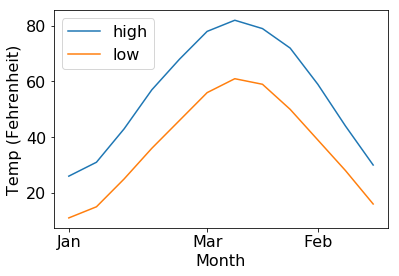

In [37]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr"])
ax.set_xticks([0, 9, 5])

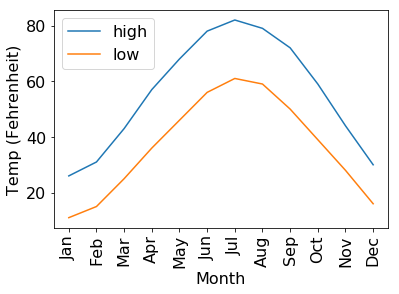

In [43]:
# TODO: better colors/styles
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index, rotation=90)
ax.set_xticks(range(12))
None

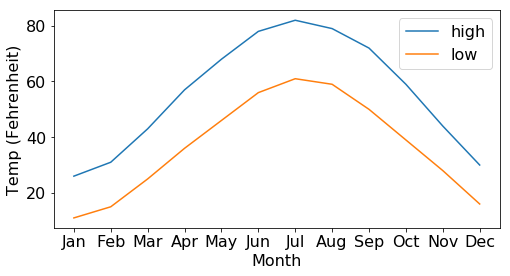

In [40]:
ax = df.plot.line(figsize=(8, 4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index)
ax.set_xticks(range(12))
None

In [44]:
# EXAMPLE 3: analyze stock market returns

In [47]:
sp500 = pd.read_csv("sp500.csv")
sp500 = sp500.set_index("year")
sp500.tail()

,return
year,
2014,1.1369
2015,1.0138
2016,1.1196
2017,1.2183
2018,0.9557


In [51]:
sp500["tot-ret"] = sp500["return"].cumprod()
sp500.head()

,return,tot-ret
year,,
1970,1.0401,1.040100
1971,1.1431,1.188938
1972,1.1898,1.414599
1973,0.8534,1.207219
1974,0.7353,0.887668


In [52]:
sp500.tail()

,return,tot-ret
year,,
2014,1.1369,88.439335
2015,1.0138,89.659797
2016,1.1196,100.383109
2017,1.2183,122.296742
2018,0.9557,116.878996


Text(0, 0.5, 'Net Worth($)')

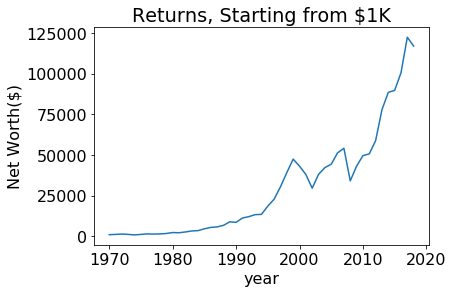

In [55]:
ax = (sp500["tot-ret"] * 1000).plot.line(title="Returns, Starting from $1K")
ax.set_ylabel("Net Worth($)")
